<img style="float:top,right" src="utils/logo_files/Logo.png" width="400">

<br><br>

# Welcome to the KinMS example notebook  

<br><br>

### Here you will learn how to import and use KinMS to generate interferometric data cubes and gain a better understanding of using the functionalities within the package.

---

Copyright (C) 2016, Timothy A. Davis
E-mail: DavisT -at- cardiff.ac.uk, zabelnj -at- cardiff.ac.uk, dawsonj5 -at- cardiff.ac.uk

---


### HOUSEKEEPING

Firstly, we want to import the KinMS package and instantiate the class so that we can freely use it throughout this example notebook

In [1]:
from KimMS import KinMS

Secondly we're going to need some more basic Python packages as well as the premade colourmap for viewing velocity maps found in $\texttt{sauron-colormap}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from utils.sauron_colormap import sauron

---

## Example 1.

### Lets try making a data cube by providing the class with the physical attributes necessary for describing a simple exponential disk. 

First lets start by creating a surface brightness profile which decays radially

In [3]:
scalerad = 10
x = np.arange(0, 1000, 0.1)
fx = np.exp(-x / scalerad)

Next, lets make the velocity profile

In [4]:
vel = np.arctan(x)
vel *= (210 / vel.max()) # Scaling the maximum velocity to 210 km/s

Although not necessary, we may also wish to provide our class with the position angle and inclination angle of our galaxy. We do that here by defining $\theta_\texttt{pos}$ and $\phi_\texttt{inc}$ respectively

In [5]:
pos = 270
inc= 45

Now we need to define the properties of the data cube which we would like to return, including the physical dimensions, channel width, and beam size

In [6]:
xsize = 128
ysize = 128
vsize = 1400
cellsize = 1
dv = 10
beamsize = [4, 4, 0]

Finally, we provide all of the parameters defined above to the class which returns the modelled data cube. 

**Note**: If you wish, the user can use the "verbose = True" argument to see useful information and feedback on the input parameters while generating the cube. We show an example of this behaviour below

In [24]:
cube = KinMS(xsize, ysize, vsize, cellsize, dv, beamSize = beamsize, inc = inc, sbProf = fx,
             sbRad = x, velProf = vel, posAng = pos, intFlux = 30, verbose = True,
             toplot = False).model_cube()  



*** Hello and welcome to the grand KinMSpy :D ***
_____________________________________
 
Setting user defined variables to: 

xs = 128
ys = 128
vs = 1400
cellSize = 1
dv = 10
beamSize = 2
intFlux = 30
inc = [60]
posAng = [270]
sbProf = user defined array of length 1000
_____________________________________
 
Setting default values to: 

inClouds = []
vLOS_clouds = []
massDist = []
seed = [100 101 102 103]
phaseCent = [0. 0.]
vOffset = 0
vPosAng = 0
vPhaseCent = [0. 0.]
restFreq = 115271000000.0
nSamps = 500000
gasSigma = [0]
diskThick = [0]
sbRad = default array of length 1000
velRad = []
velProf = default array of length 1000
flux_clouds = [0]
vRadial = [0]
_____________________________________
 
Setting options to: 

inClouds_given = True
fileName = False
fixSeed = False
cleanOut = False
returnClouds = False
huge_beam = False
pool = False
verbose = True
toplot = False
_____________________________________

Generating cloudlets, Using a constant scale height of [0].

"velRad" not s

If on the other hand, you do not wish to see this information (for example during MCMC fitting routines), it is easy to switch off by either not using the verbose argument or setting it to False explicitly.

A similar behaviour exists for outputting plots of the generated cube, which can also be toggled on and off. Plots are created by passing the "toplot = True" argument. We show this behaviour below

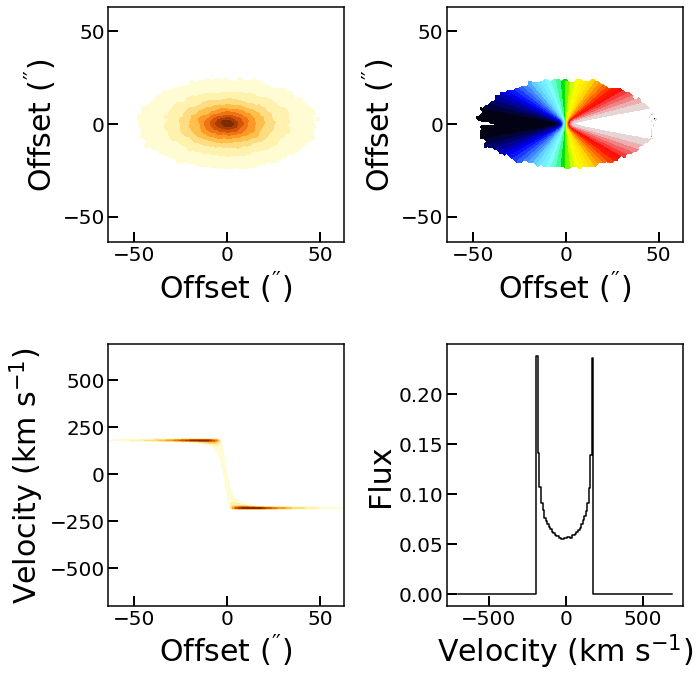

In [25]:
cube = KinMS(xsize, ysize, vsize, cellsize, dv, beamSize = beamsize, inc = inc, sbProf = fx,
             sbRad = x, velProf = vel, posAng = pos, intFlux = 30, verbose = False,
             toplot = True).model_cube()        

Next we're going to demonstrate the use of $\texttt{inclouds}$, which allows the user to pass specific cloudlet positions and their associated velocities to $\texttt{KinMS}$. 

As in the first example, we need to set up our cube parameters

In [8]:
xsize = 128
ysize = 128
vsize = 1400
cellsize = 1
dv = 10
beamsize = [4, 4, 0]
inc = 35
intflux = 30
posang = 270

Rather than assign velocities to the particles themselves, we can choose to pass a velocity profile if we want. Here we create a velocity profile with a few radial position anchors and linearly interpolate between them to get a full profile

In [9]:
x = np.arange(0, 100, 0.1)
velfunc = interpolate.interp1d([0, 0.5, 1, 3, 500], [0, 50, 100, 210, 210], kind = 'linear')
vel = velfunc(x)

Lastly, for the setup, we specify the positions of the cloudlets we wish to pass to $\texttt{KinMS()}$

In [10]:
inclouds = np.array([[40, 0, 0], [39.5075, 6.25738, 0], [38.0423, 12.3607, 0.00000], [35.6403, 18.1596, 0],
                     [32.3607, 23.5114, 0], [28.2843, 28.2843, 0], [23.5114, 32.3607, 0], [18.1596, 35.6403, 0],
                     [12.3607, 38.0423, 0], [6.25737, 39.5075, 0], [0, 40, 0], [-6.25738, 39.5075, 0],
                     [-12.3607, 38.0423, 0], [-18.1596, 35.6403, 0], [-23.5114, 32.3607, 0],
                     [-28.2843, 28.2843, 0], [-32.3607, 23.5114, 0], [-35.6403, 18.1596, 0],
                     [-38.0423, 12.3607, 0], [-39.5075, 6.25738, 0], [-40, 0, 0], [-39.5075, -6.25738, 0],
                     [-38.0423,-12.3607, 0], [-35.6403, -18.1596, 0], [-32.3607, -23.5114, 0], [-28.2843, -28.2843, 0],
                     [-23.5114, -32.3607, 0], [-18.1596, -35.6403, 0], [-12.3607,-38.0423, 0], [-6.25738, -39.5075, 0],
                     [0, -40, 0], [6.25738, -39.5075, 0], [12.3607, -38.0423, 0], [18.1596, -35.6403, 0],
                     [23.5114, -32.3607, 0], [28.2843, -28.2843, 0], [32.3607,-23.5114, 0],  [35.6403, -18.1596, 0],
                     [38.0423, -12.3607, 0], [39.5075, -6.25737, 0], [15, 15, 0], [-15, 15, 0],
                     [-19.8504, -2.44189, 0], [-18.0194, -8.67768, 0], [-14.2856, -13.9972, 0],
                     [-9.04344, -17.8386, 0], [-2.84630, -19.7964, 0], [3.65139, -19.6639, 0],
                     [9.76353, -17.4549, 0], [14.8447, -13.4028, 0], [18.3583, -7.93546, 0],
                     [19.9335, -1.63019, 0]])

Again, lets make a cube with all the specified parameters above

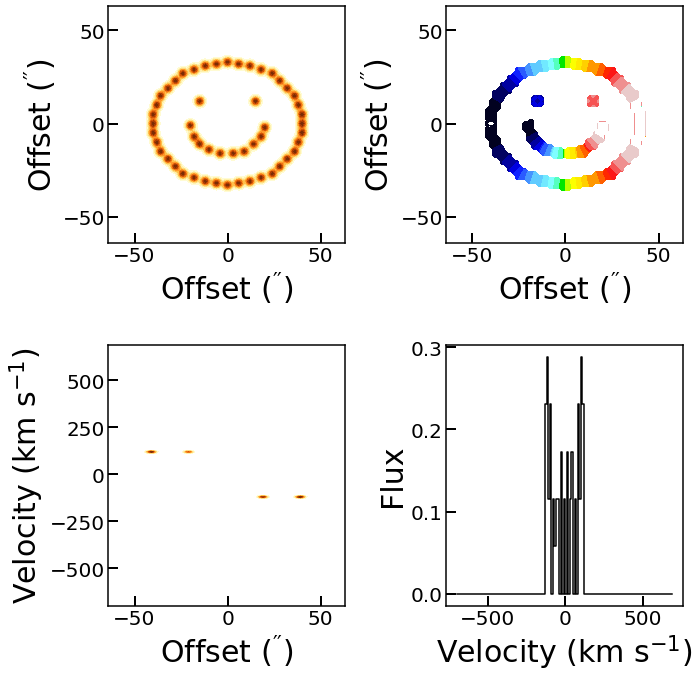

In [11]:
cube = KinMS(xsize, ysize, vsize, cellsize, dv, beamsize, inc, intFlux = intflux, inClouds = inclouds,
             velProf = vel, velRad = x, posAng = posang, toplot = True).model_cube()

---

## Example 3.

$\texttt{KinMS}$ can accomodate dynamical objects not just orderly rotating galaxies. In this example we will demonstrate the creation of datacubes containing a galaxy with a non-zero thickness disk with a warp in the position angle across the radius of the disk.

As in the other examples, we need to set up our cube parameters

In [12]:
xsize = 128
ysize = 128
vsize = 1400
cellsize = 1
dv = 10
beamsize = 2
intflux = 30

Next we need to create an array of position angle values

In [14]:
fcent = 10
scalerad = 20
inc = 60
x = np.arange(0, 100, 0.1)
fx = fcent * np.exp(-x / scalerad)
velfunc = interpolate.interp1d([0, 0.5, 1, 3, 500], [0, 50, 100, 210, 210], kind='linear')
vel = velfunc(x)
diskthickfunc = interpolate.interp1d([0, 15, 50, 500], [270, 270, 300, 300], kind='linear')
posang = diskthickfunc(x)

And lastly, we simply run KinMS to generate the final cube

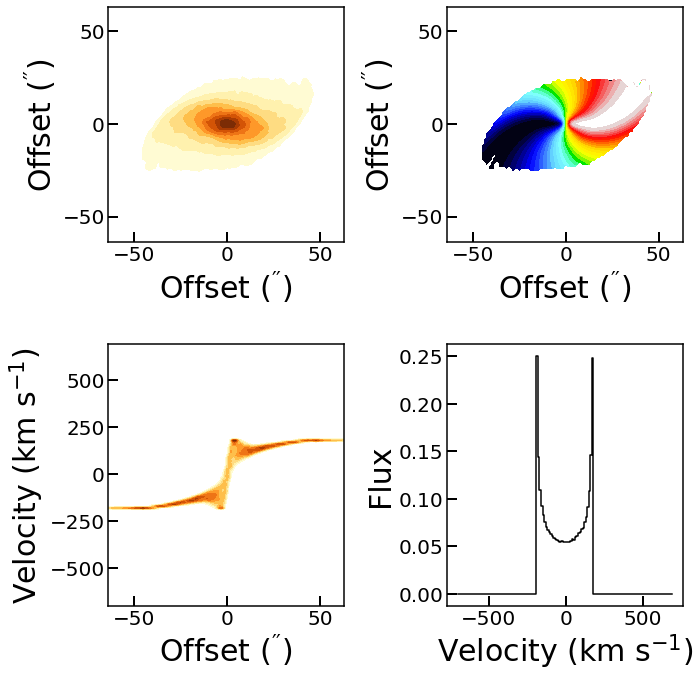

In [15]:
cube = KinMS(xsize, ysize, vsize, cellsize, dv, beamsize, inc, sbProf=fx, sbRad=x, velProf=vel, intFlux=intflux,
                 posAng=posang, toplot=True).model_cube()

---

## Final notes

For a more in-depth exploration of the capabilities of $\texttt{KinMS}$, please check out the $\texttt{KinMS}$ testsuite in the GitHub repository!